In [1]:
#  Sales and Customer Behavior Dataset Exploratory Data Analysis

In [2]:
# import Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# loading dataset

In [11]:
data = {
    'OrderID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'CustomerID': ['C001', 'C002', 'C003', 'C004', 'C001', 'C002', 'C005', 'C006', 'C007', 'C001'],
    'ProductID': ['P001', 'P002', 'P003', 'P001', 'P004', 'P002', 'P005', 'P006', 'P003', 'P001'],
    'Quantity': [2, 1, 3, 1, 4, 2, 1, 1, 2, 1],
    'Price': [50.00, 150.00, 20.00, 50.00, 15.00, 150.00, 100.00, 200.00, 20.00, 50.00],
    'OrderDate': ['2024-07-01', '2024-07-02', '2024-07-02', '2024-07-03', '2024-07-03',
                                 '2024-07-05', '2024-07-06', '2024-07-07', '2024-07-08', '2024-07-09'],
    'Category': ['Electronics', 'Apparel', 'Groceries', 'Electronics', 'Groceries', 'Apparel', 'Home', 'Electronics', 'Groceries', 'Electronics'],
    'Region': ['North', 'East', 'West', 'South', 'North', 'East', 'West', 'North', 'East', 'North']
}

In [12]:
df = pd.DataFrame(data)
df

,OrderID,CustomerID,ProductID,Quantity,Price,OrderDate,Category,Region
0,1001,C001,P001,2,50.0,2024-07-01,Electronics,North
1,1002,C002,P002,1,150.0,2024-07-02,Apparel,East
2,1003,C003,P003,3,20.0,2024-07-02,Groceries,West
3,1004,C004,P001,1,50.0,2024-07-03,Electronics,South
4,1005,C001,P004,4,15.0,2024-07-03,Groceries,North
5,1006,C002,P002,2,150.0,2024-07-05,Apparel,East
6,1007,C005,P005,1,100.0,2024-07-06,Home,West
7,1008,C006,P006,1,200.0,2024-07-07,Electronics,North
8,1009,C007,P003,2,20.0,2024-07-08,Groceries,East
9,1010,C001,P001,1,50.0,2024-07-09,Electronics,North


In [13]:
df.count()

OrderID       10
CustomerID    10
ProductID     10
Quantity      10
Price         10
OrderDate     10
Category      10
Region        10
dtype: int64

In [14]:
# Data cleaning

In [15]:
# check for null values
df.isnull()

,OrderID,CustomerID,ProductID,Quantity,Price,OrderDate,Category,Region
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [16]:
# objective 1:
# Identify top-selling products

In [17]:
df["TotalSales"]= df["Quantity"]*df["Price"]

In [18]:
df["TotalSales"]

0    100.0
1    150.0
2     60.0
3     50.0
4     60.0
5    300.0
6    100.0
7    200.0
8     40.0
9     50.0
Name: TotalSales, dtype: float64

In [19]:
# Highest Sales details

In [20]:
# find max index from totalsales
max_sales=df["TotalSales"].idxmax()

In [22]:
height_sales = df.loc[max_sales]
height_sales

OrderID             1006
CustomerID          C002
ProductID           P002
Quantity               2
Price              150.0
OrderDate     2024-07-05
Category         Apparel
Region              East
TotalSales         300.0
Name: 5, dtype: object

In [23]:
# so,productId--->p002 which 2nd product has highest sales

In [24]:
# Group by productID to find top-selling products
top_products = df.groupby("ProductID")["TotalSales"].sum().sort_values(ascending=False).head()

In [25]:
top_products

ProductID
P002    450.0
P001    200.0
P006    200.0
P003    100.0
P005    100.0
Name: TotalSales, dtype: float64

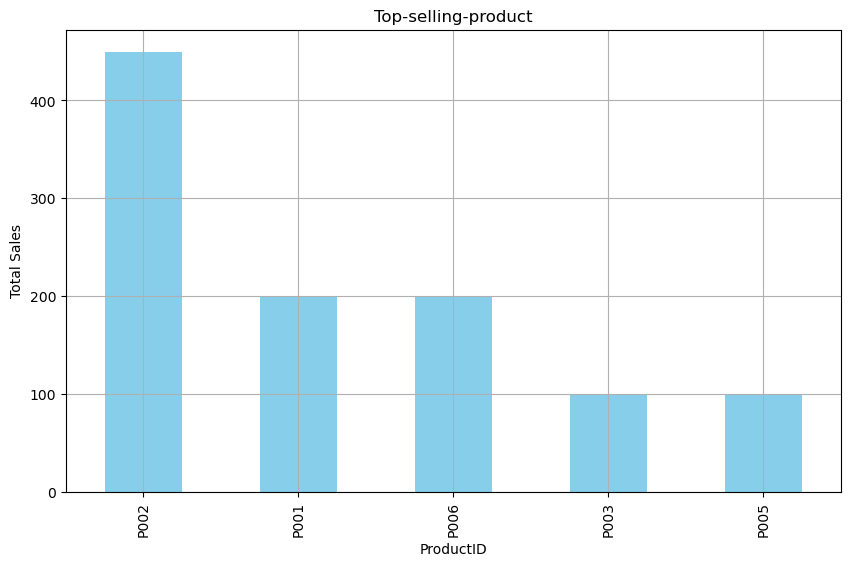

In [28]:
plt.figure(figsize=(10,6))
top_products.plot(kind = "bar",color ="skyblue")
plt.title("Top-selling-product")
plt.xlabel("ProductID")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [30]:
# Top selling Product by Region
regional_sales = df.groupby("Region")["TotalSales"].sum().sort_index()
regional_sales

Region
East     490.0
North    410.0
South     50.0
West     160.0
Name: TotalSales, dtype: float64

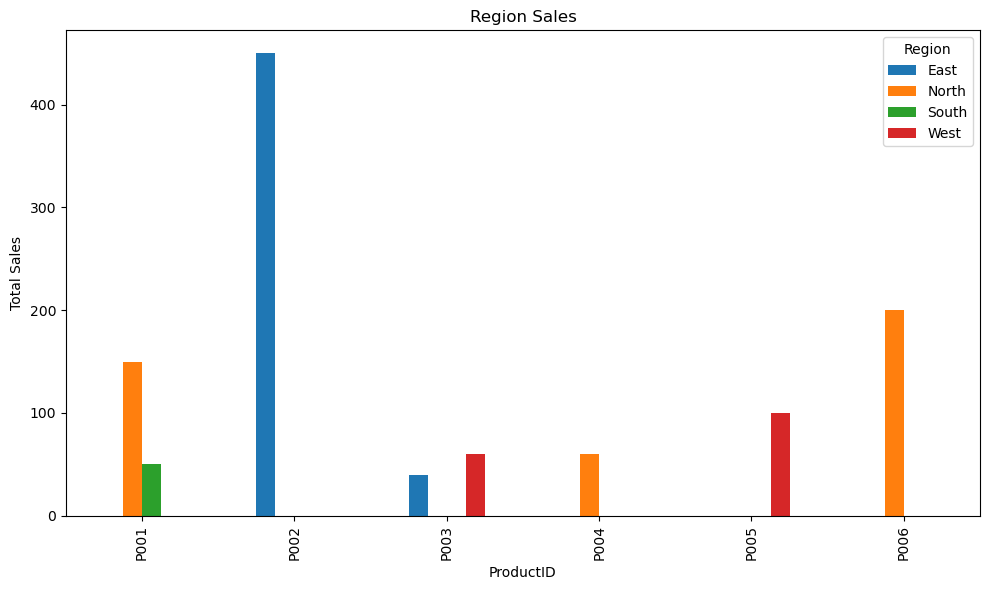

In [32]:
# Pivot the DataFrame for easier plotting
pivot_df = df.pivot_table(index="ProductID",columns="Region",values="TotalSales",aggfunc ="sum",fill_value=0)
#plot
pivot_df.plot(kind = "bar",figsize = (10,6))
plt.title("Region Sales")
plt.xlabel("ProductID")
plt.ylabel("Total Sales")
plt.legend(title = "Region")
plt.tight_layout()
plt.show()


In [33]:
#objective2

In [34]:
# Analyze customer purchasing Patterns.

In [35]:
# Here i' m using stastistical methods to analyze the customer behaviors

In [36]:
# Descriptive Statistics

In [37]:
# mean
# median
# standard Deviation std()

In [38]:
mean_value = df["TotalSales"].mean()
mean_value

111.0

In [39]:
median_value = df["TotalSales"].median()
median_value

80.0

In [40]:
std_value = df["TotalSales"].std()
std_value

83.72574275573791

In [41]:
df.describe() # this is in-built pandas method to find its discriptive statistics 

,OrderID,Quantity,Price,TotalSales
count,10.00000,10.000000,10.000000,10.000000
mean,1005.50000,1.800000,80.500000,111.000000
std,3.02765,1.032796,65.593445,83.725743
min,1001.00000,1.000000,15.000000,40.000000
25%,1003.25000,1.000000,27.500000,52.500000
50%,1005.50000,1.500000,50.000000,80.000000
75%,1007.75000,2.000000,137.500000,137.500000
max,1010.00000,4.000000,200.000000,300.000000


In [42]:
purchase_frequency = df.groupby("CustomerID")["OrderID"].count().reset_index()
purchase_frequency.columns =["CustomerID","PurchaseFrequency"]
purchase_frequency

,CustomerID,PurchaseFrequency
0,C001,3
1,C002,2
2,C003,1
3,C004,1
4,C005,1
5,C006,1
6,C007,1


In [44]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
last_purchase = df.groupby("CustomerID")["OrderDate"].max().reset_index()
last_purchase["Recency (day ago)"] = (df["OrderDate"].max()-last_purchase["OrderDate"]).dt.days
last_purchase

,CustomerID,OrderDate,Recency (day ago)
0,C001,2024-07-09,0
1,C002,2024-07-05,4
2,C003,2024-07-02,7
3,C004,2024-07-03,6
4,C005,2024-07-06,3
5,C006,2024-07-07,2
6,C007,2024-07-08,1


In [45]:
monetary_value = df.groupby("CustomerID")["TotalSales"].sum().reset_index()
monetary_value.columns = ["CustomerID","MonetaryValue"]
monetary_value

,CustomerID,MonetaryValue
0,C001,210.0
1,C002,450.0
2,C003,60.0
3,C004,50.0
4,C005,100.0
5,C006,200.0
6,C007,40.0


In [47]:
customer_sales = df.groupby("CustomerID")["TotalSales"].sum().reset_index()
customer_sales

,CustomerID,TotalSales
0,C001,210.0
1,C002,450.0
2,C003,60.0
3,C004,50.0
4,C005,100.0
5,C006,200.0
6,C007,40.0


In [55]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(customer_sales[['TotalSales']])
kmeans

C:\Users\himanshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\himanshu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [56]:
customer_sales["segment"]=kmeans.labels_
customer_sales

,CustomerID,TotalSales,segment
0,C001,210.0,2
1,C002,450.0,1
2,C003,60.0,0
3,C004,50.0,0
4,C005,100.0,0
5,C006,200.0,2
6,C007,40.0,0


In [57]:
# Segment 0: Customers with lower total sales.
# Segment 1: Customers with the highest total sales.
# Segment 2: Customers with moderate total sales.

In [58]:
# product Analysis and sales Trends

In [59]:
product_sales = df.groupby("ProductID")["TotalSales"].sum().reset_index()
product_sales["Contribution %"]=product_sales["TotalSales"]/product_sales["TotalSales"].sum()*100
# claculating percentages of contributions
product_sales

,ProductID,TotalSales,Contribution %
0,P001,200.0,18.018018
1,P002,450.0,40.540541
2,P003,100.0,9.009009
3,P004,60.0,5.405405
4,P005,100.0,9.009009
5,P006,200.0,18.018018


In [60]:
sales_trends = df.groupby("OrderDate")["TotalSales"].sum().reset_index()
sales_trends

,OrderDate,TotalSales
0,2024-07-01,100.0
1,2024-07-02,210.0
2,2024-07-03,110.0
3,2024-07-05,300.0
4,2024-07-06,100.0
5,2024-07-07,200.0
6,2024-07-08,40.0
7,2024-07-09,50.0


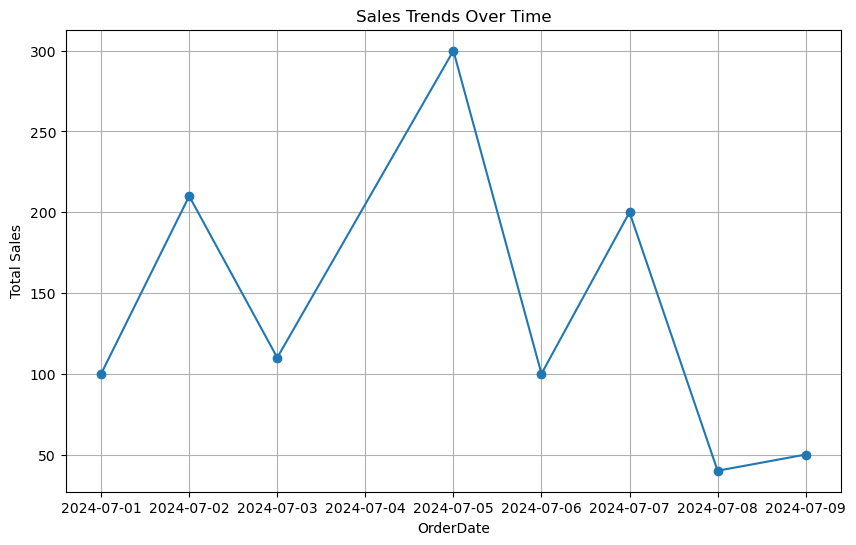

In [61]:
plt.figure(figsize=(10,6))
plt.plot(sales_trends["OrderDate"],sales_trends["TotalSales"],marker ="o")
plt.title("Sales Trends Over Time")
plt.xlabel("OrderDate")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [62]:
# sales Growth Over the Days in a Month
df["Growth_Rate"]=df["TotalSales"].pct_change(periods=1)*100
sales_growth = df.groupby("OrderDate")["Growth_Rate"].sum().reset_index()
sales_growth

,OrderDate,Growth_Rate
0,2024-07-01,0.000000
1,2024-07-02,-10.000000
2,2024-07-03,3.333333
3,2024-07-05,400.000000
4,2024-07-06,-66.666667
5,2024-07-07,100.000000
6,2024-07-08,-80.000000
7,2024-07-09,25.000000


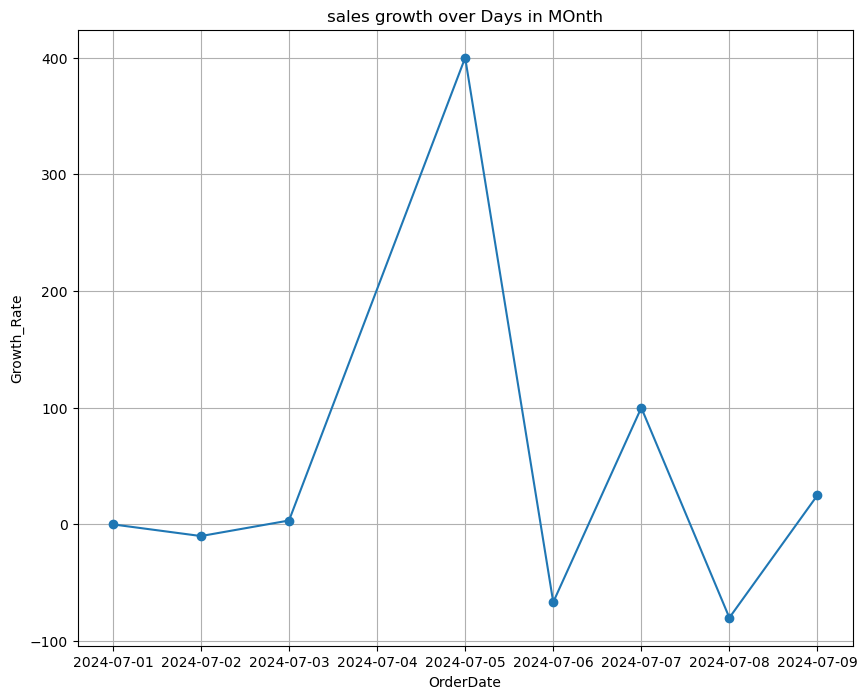

In [63]:
# line Graph
plt.figure(figsize =(10,8))
plt.plot(sales_growth["OrderDate"],sales_growth["Growth_Rate"],marker="o")
plt.title("sales growth over Days in MOnth")
plt.xlabel("OrderDate")
plt.ylabel("Growth_Rate")
plt.grid(True)
plt.show()

In [64]:
# Revenue by Category

In [65]:
revenue_optimization = df.groupby("Category")["TotalSales"].sum().reset_index()
revenue_optimization["RevenueContribution(%)"] = (revenue_optimization["TotalSales"]/df["TotalSales"])*100-1
revenue_optimization

,Category,TotalSales,RevenueContribution(%)
0,Apparel,450.0,449.000000
1,Electronics,400.0,265.666667
2,Groceries,160.0,265.666667
3,Home,100.0,199.000000


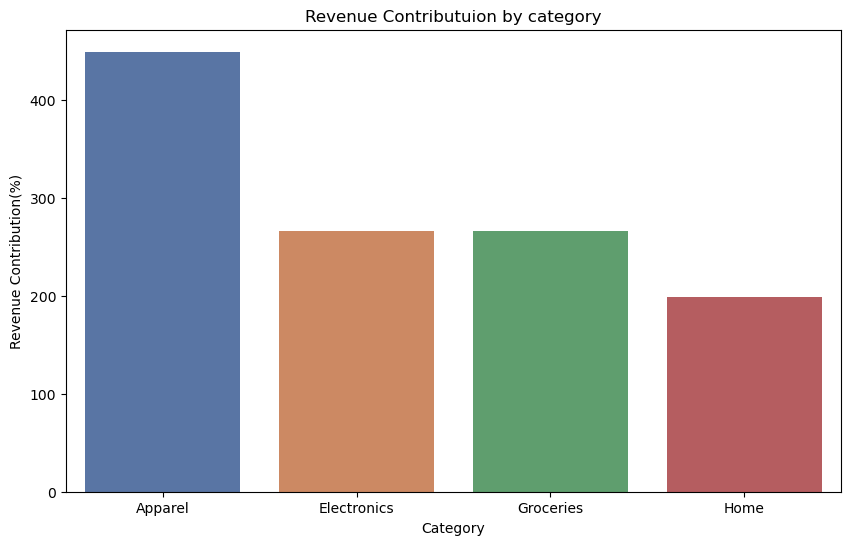

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Category",y="RevenueContribution(%)",data = revenue_optimization,palette ="deep")
plt.title("Revenue Contributuion by category")
plt.xlabel("Category")
plt.ylabel("Revenue Contribution(%)")
plt.show()

In [67]:
# Objective 3:
# Optimize inventory levels to reduce stockouts and overstock.

In [68]:
#  sales performance of each product and identify which products require restocking. 
inventory_management = df.groupby('ProductID')["Quantity"].sum().reset_index()
inventory_management = inventory_management.rename(columns={'Quantity': 'TotalQuantitySold'})
inventory_management 

,ProductID,TotalQuantitySold
0,P001,4
1,P002,3
2,P003,5
3,P004,4
4,P005,1
5,P006,1


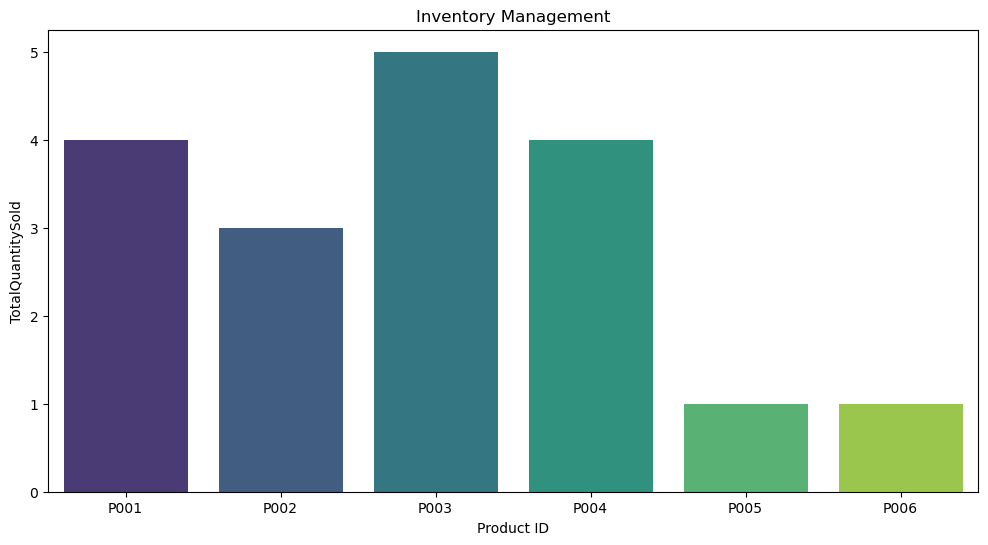

In [69]:
#plot bar graph for Inventory Management
plt.figure(figsize=(12,6))
sns.barplot(x='ProductID', y="TotalQuantitySold", data =inventory_management, palette='viridis' )
plt.title("Inventory Management")
plt.xlabel('Product ID')
plt.ylabel('TotalQuantitySold')
plt.show()

In [ ]:
# Insights¶
# Customer Segmentation:
# Most customers fall into Segment 0, indicating a lower purchase volume, while only a few customers (C002) make up the highest sales segment (Segment 1).

# Product Performance:
# Product P002 is the top-selling product, contributing over 40% of the total sales. Focusing marketing efforts on such high-performing products could boost sales.
# Most of the products from P002 are sold in East Region which shows lead in Sales.

# Sales Trends:
# There is a noticeable peak in sales on specific dates (e.g., 2024-07-05), which could be due to promotions or other events. Identifying these trends helps in planning future sales strategies.

# Revenue
# Among the categories 'Apperal's are the most Procduct Sold and Generated more Revenue its Evident that Product ID P002 is Top Selling product, more sales in East Region and highest revenue generating Product.

# Inventory management
# Product P003 has to restock or reload the product as its the one whcih is sold more in Quantity (TotalQuantitySold = 5).

# Recommendations
# -- Need a attentions to the marketing strategies for least sold produdt P003(Under Performing in East and west) regions.
# -- Focus on expanding the Electronics product